In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import default_rng

# Numpy financial functions have been removed to their own package
# See https://numpy.org/numpy-financial/
import numpy_financial as npf

In [2]:
from whatif import Model
from whatif import get_sim_results_df

In [3]:
%matplotlib inline

In [23]:
class SingleProductSPF(Model):
    def __init__(self, fixed_cost=60e+3, var_cost=90, selling_price=120,
                 spf_scale=10e+6, spf_exponent=-1.8):
        
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_scale = spf_scale
        self.spf_exponent = spf_exponent

    def demand(self):
        """Demand based on SPF power function
        
        D = a * P ** b
        """
        
        _demand = self.spf_scale * self.selling_price ** self.spf_exponent
        
        return _demand
    
    def tot_revenue(self):
        """Total revenue
        
        D * P
        """
        
        _tot_revenue = self.demand() * self.selling_price
        
        return _tot_revenue
    
    def tot_cost(self):
        """Total cost
        
        Fixed Cost + Var Cost * P
        """
        
        _tot_cost = self.fixed_cost + self.var_cost * self.demand()
        
        return _tot_cost

    def profit(self):
        """Profit
        
        Total revenue - total cost
        """
        
        _profit = self.tot_revenue() - self.tot_cost()
        
        return _profit

In [24]:
model = SingleProductSPF()
print(model)

{'fixed_cost': 60000.0, 'var_cost': 90, 'selling_price': 120, 'spf_scale': 10000000.0, 'spf_exponent': -1.8}


In [25]:
print(model.demand())
print(model.tot_revenue())
print(model.tot_cost())
print(model.profit())

1809.146586595383
217097.59039144596
222823.1927935845
-5725.602402138524


In [8]:
model.goal_seek?

Signature: model.goal_seek(obj_fn, target, by_changing, a, b, N=100)
Docstring:
Approximate solution of f(x)=0 on interval [a,b] by bisection method.

Parameters
----------
obj_fn : str
    The function name for which we are trying to approximate a solution f(x)=target.
target : float
    The goal
by_changing : str
    Name of the input variable in model
a,b : numbers
    The interval in which to search for a solution. The function returns
    None if (f(a) - target) * (f(b) - target) >= 0 since a solution is not guaranteed.
N : (positive) integer
    The number of iterations to implement.

Returns
-------
x_N : number
    The midpoint of the Nth interval computed by the bisection method. The
    initial interval [a_0,b_0] is given by [a,b]. If f(m_n) - target == 0 for some
    midpoint m_n = (a_n + b_n)/2, then the function returns this solution.
    If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
    iteration, the bisection method fails and return None.
File:   

In [28]:
print(f"Break even selling price: {model.goal_seek('profit', 0, 'selling_price', 90, 250):.2f}")

Break even selling price: 126.43


In [30]:
selling_prices = {'selling_price': np.arange(90, 501, 10)}
dt_selling_price = model.data_table(selling_prices, ['demand', 'tot_revenue', 'tot_cost', 'profit'])
dt_selling_price

,selling_price,demand,tot_revenue,tot_cost,profit
0,90,3036.431464,273278.831761,333278.831761,-60000.000000
1,100,2511.886432,251188.643151,286069.778836,-34881.135685
2,110,2115.890393,232747.943240,250430.135379,-17682.192138
3,120,1809.146587,217097.590391,222823.192794,-5725.602402
4,130,1566.397444,203631.667747,200975.769978,2655.897768
5,140,1370.785607,191909.984985,183370.704633,8539.280352
6,150,1210.697746,181604.661828,168962.797097,12641.864731
7,160,1077.913798,172466.207683,157012.241821,15453.965861
8,170,966.477931,164301.248240,146983.013774,17318.234466
9,180,871.985957,156957.472250,138478.736125,18478.736125


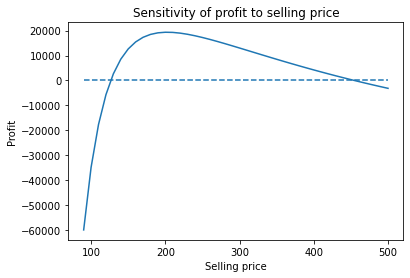

In [35]:
plt.title("Sensitivity of profit to selling price")
plt.xlabel("Selling price")
plt.ylabel("Profit")
plt.plot(dt_selling_price['selling_price'], dt_selling_price['profit'])
plt.hlines(0, dt_selling_price['selling_price'].min(), dt_selling_price['selling_price'].max(),
          linestyles='--')
plt.show();

## Simulation
Let's add uncertainty around the spf exponent.

In [37]:
rg = default_rng(4)
num_sim_reps = 1000

In [38]:
random_inputs = {'spf_exponent': rg.uniform(-2.0, -1.6, size=num_sim_reps)}

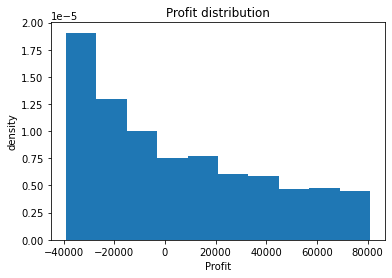

In [41]:
sim_results = model.simulate(random_inputs, ['profit'])
sim_results_df = get_sim_results_df(sim_results)

plt.title("Profit distribution")
plt.xlabel("Profit")
plt.ylabel("density")
plt.hist(sim_results_df['profit'], density=True);
plt.show();

## Extended model

In [69]:
class SingleProductSPF_extended(Model):
    def __init__(self, fixed_cost=60e+3, var_cost=90, selling_price=120,
                 spf_scale=10e+6, spf_exponent=-1.8,
                 ot_threshold=1000, ot_var_cost=110, lost_demand_threshold=1200):
        
        self.fixed_cost = fixed_cost
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.spf_scale = spf_scale
        self.spf_exponent = spf_exponent
        self.ot_threshold = ot_threshold
        self.ot_var_cost = ot_var_cost
        self.lost_demand_threshold = lost_demand_threshold

    def demand(self):
        """Demand based on SPF power function
        
        D = a * P ** b
        """
        
        _demand = self.spf_scale * self.selling_price ** self.spf_exponent
        
        return _demand
    
    def units_sold(self):
        """Number of units sold
        
        Min of D and lost_demand_threshold
        """
        
        demand = self.demand()
        _units_sold = np.minimum(demand, self.lost_demand_threshold)
        return _units_sold
    
    def tot_revenue(self):
        """Total revenue
        
        D * P
        """
        
        _tot_revenue = self.units_sold() * self.selling_price
        
        return _tot_revenue
    
    def tot_var_cost(self):
        
        units_sold = self.units_sold()
        units_at_base_cost = np.minimum(units_sold, self.ot_threshold)
        units_at_ot_cost = np.maximum(0, units_sold - self.ot_threshold)
        
        _tot_var_cost = self.var_cost * units_at_base_cost + self.ot_var_cost * units_at_ot_cost
        return _tot_var_cost
    
    def tot_cost(self):
        """Total cost
        
        Fixed Cost + Var Cost * P
        """
        
        _tot_cost = self.fixed_cost + self.tot_var_cost()
        
        return _tot_cost

    def profit(self):
        """Profit
        
        Total revenue - total cost
        """
        
        _profit = self.tot_revenue() - self.tot_cost()
        
        return _profit

In [70]:
model_x = SingleProductSPF_extended()

In [71]:
print(model_x.units_sold())

1200.0


In [72]:
print(model_x.tot_var_cost())

112000.0


In [73]:
print(model_x.profit())

-28000.0


In [74]:
dt_selling_price_x = model_x.data_table(selling_prices, ['profit', 'demand', 'units_sold', ])
dt_selling_price_x

,selling_price,profit,demand,units_sold
0,90,-64000.000000,3036.431464,1200.000000
1,100,-52000.000000,2511.886432,1200.000000
2,110,-40000.000000,2115.890393,1200.000000
3,120,-28000.000000,1809.146587,1200.000000
4,130,-16000.000000,1566.397444,1200.000000
5,140,-4000.000000,1370.785607,1200.000000
6,150,8000.000000,1210.697746,1200.000000
7,160,13895.689901,1077.913798,1077.913798
8,170,17318.234466,966.477931,966.477931
9,180,18478.736125,871.985957,871.985957


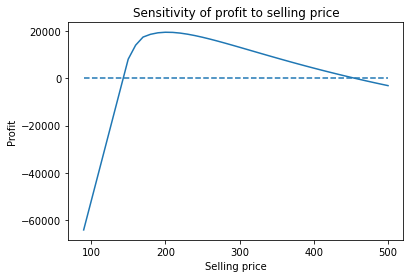

In [75]:
plt.title("Sensitivity of profit to selling price")
plt.xlabel("Selling price")
plt.ylabel("Profit")
plt.plot(dt_selling_price_x['selling_price'], dt_selling_price_x['profit'])
plt.hlines(0, dt_selling_price_x['selling_price'].min(), dt_selling_price_x['selling_price'].max(),
          linestyles='--')
plt.show();

In [76]:
print(f"Break even selling price: {model_x.goal_seek('profit', 0, 'selling_price', 90, 250):.2f}")

Break even selling price: 143.33


In [77]:
print(f"Break even selling price: {model_x.goal_seek('profit', 0, 'selling_price', 200, 500):.2f}")

Break even selling price: 454.47
